<a href="https://colab.research.google.com/github/Prabhakamaraj/ZEOTAP-1/blob/main/customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/Customers.csv')

In [5]:
print("First 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [6]:
print("\nDataset Info:")
print(data.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [7]:
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [8]:
print("\nMissing Values Count:")
print(data.isnull().sum())



Missing Values Count:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [10]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [11]:
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
for col in non_numeric_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

In [12]:
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()


In [13]:
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [14]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()


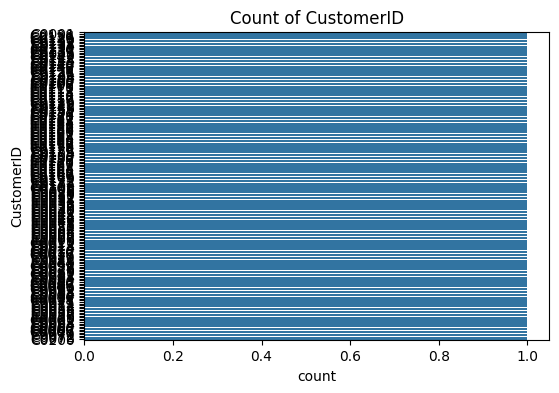

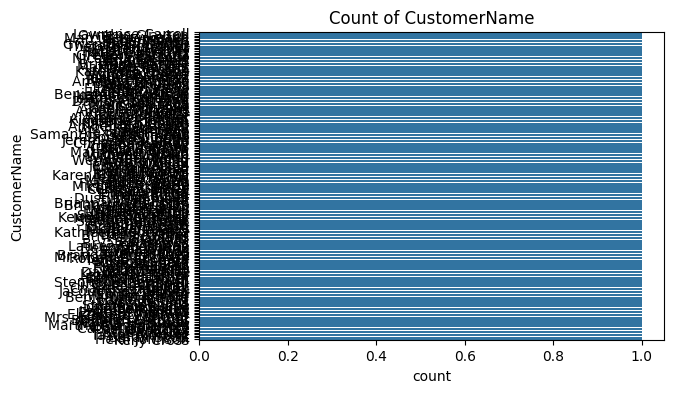

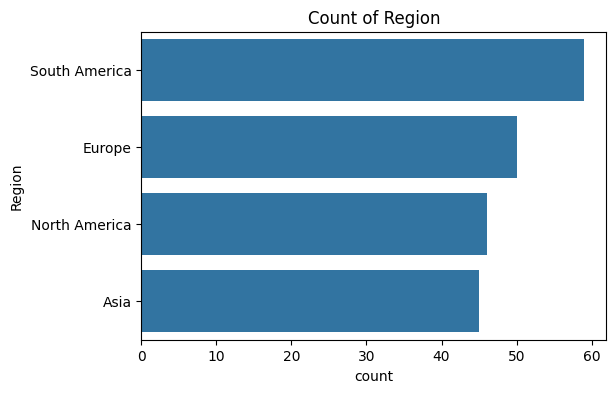

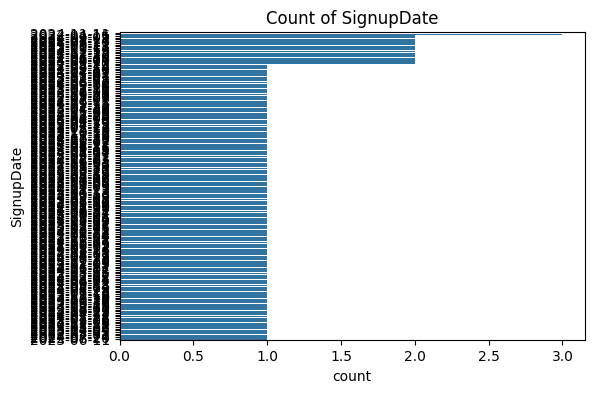

In [15]:
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.show()


In [17]:
numeric_data = data.select_dtypes(include=[np.number])

In [19]:
print(numeric_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Empty DataFrame
None


In [20]:
# Ensure the data has numeric columns
numeric_data = data.select_dtypes(include=[np.number])

if numeric_data.empty:
    print("No numeric data available for correlation analysis.")
else:
    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()


No numeric data available for correlation analysis.


In [21]:
print(data.dtypes)


CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object


In [22]:
if len(numeric_columns) >= 2:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=numeric_columns[0], y=numeric_columns[1], data=data)
    plt.title(f"Scatter Plot: {numeric_columns[0]} vs {numeric_columns[1]}")
    plt.show()

In [23]:
if categorical_columns and numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=categorical_columns[0], y=numeric_columns[0], data=data)
    plt.title(f"Boxplot: {numeric_columns[0]} by {categorical_columns[0]}")
    plt.xticks(rotation=45)
    plt.show()

In [24]:
if len(numeric_columns) > 1:
    sns.pairplot(data[numeric_columns])
    plt.title("Pair Plot for Numeric Features")
    plt.show()

In [25]:
print("\nKey Insights:")
print("- Look at the heatmap to identify highly correlated variables.")
print("- Review the boxplots for categorical vs numeric variables for trends.")
print("- Note outliers in histograms or boxplots.")



Key Insights:
- Look at the heatmap to identify highly correlated variables.
- Review the boxplots for categorical vs numeric variables for trends.
- Note outliers in histograms or boxplots.
